<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/04_pytorch_custom_datasets_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Загрузим данные

In [17]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
DATA_PATH = Path("data/")
IMAGE_PATH = DATA_PATH / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if IMAGE_PATH.is_dir():
    print(f"{IMAGE_PATH} directory exists.")
else:
    print(f"{IMAGE_PATH} directory creating one...")
    IMAGE_PATH.mkdir(parents=True, exist_ok=True)

with open(DATA_PATH / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data...")
    f.write(request.content)

with zipfile.ZipFile(DATA_PATH / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data...") 
    zip_ref.extractall(IMAGE_PATH)


data/pizza_steak_sushi directory exists.
Unzipping data...


## Посмотрим на данные

In [18]:
import os

def walk_through_dir(dir_path):
    """Проходит по dir_path и возвращает данные"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [19]:
walk_through_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'


In [22]:
TRAIN_DIR = IMAGE_PATH / "train"
TEST_DIR = IMAGE_PATH / "test"

Random image path: data/pizza_steak_sushi/train/sushi/1575445.jpg
Image class: sushi
Image height, width: 307, 512


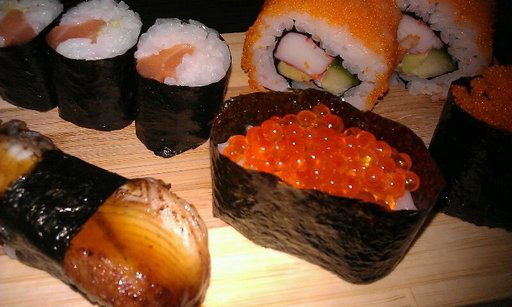

In [53]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(IMAGE_PATH.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height, width: {img.height}, {img.width}")
img

Text(0.5, 1.0, 'Image class: sushi | Image shape: (307, 512, 3) -> [h,w,c]')

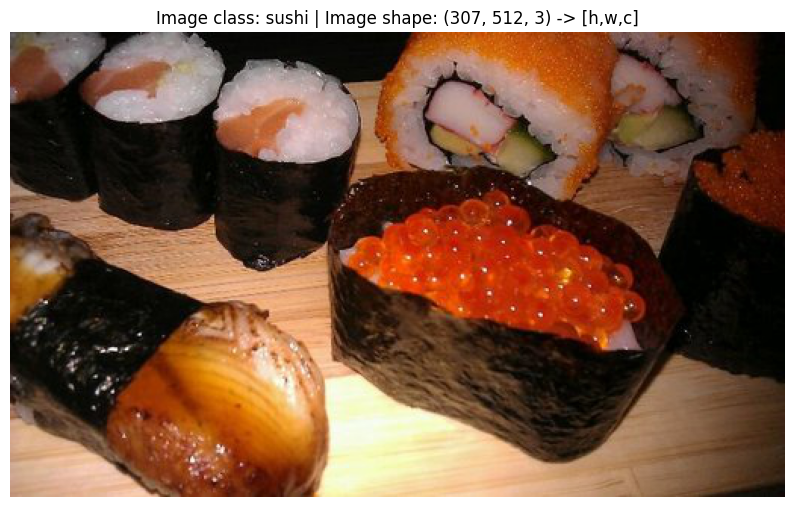

In [54]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [h,w,c]")

## Преобразуем данные

In [55]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [56]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

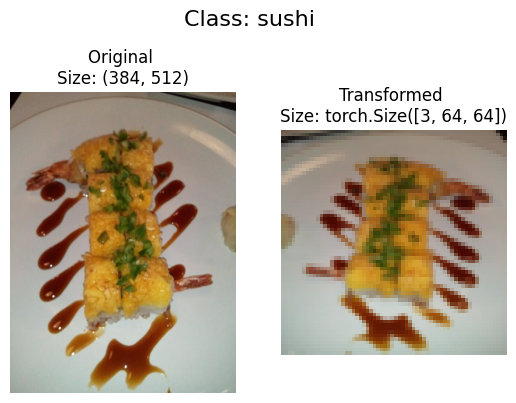

In [64]:
def plot_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=42):
    if seed:
        random.seed(seed)
    random_images_paths = random.sample(image_paths, k=n)
    for image_path in random_images_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)

            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f)

            ax[1].imshow(transformed_image.permute(1, 2, 0))
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=1)